<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/06_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Trees

#### Overview
  - It is a powerful and versatile supervised learning algorithm used for both classification and regression tasks.
  - It works by recursively splitting the data into subsets based on feature values, with the goal of improving the homogeneity of the subsets concerning the target variable.
  - The structure of a decision tree is a tree-like model where each internal node represents a test on an attribute, each branch represents an outcome of the test, and each leaf node represents a class label (in classification) or a continuous value (in regression).

#### Key Concepts

1. **Root Node**: The top node of the tree, representing the entire dataset, which is split into subsets.
2. **Decision Node**: An internal node that splits the data into two or more branches based on a feature.
3. **Leaf Node**: The terminal node that holds a class label or regression value. It signifies the decision outcome.
4. **Splitting**: The process of dividing a node into two or more sub-nodes based on a feature.
5. **Pruning**: The process of removing parts of the tree that do not provide power to classify instances, reducing the tree's size and avoiding overfitting.
6. **Entropy and Information Gain**: In classification, entropy measures the impurity in a set, while information gain measures the reduction in entropy achieved after splitting the data on an attribute.
7. **Gini Impurity**: Another criterion used to measure the impurity or purity of a node. It is used by algorithms like CART (Classification and Regression Tree).

#### Decision Trees as Non-Linear Algorithms

Decision trees are inherently **non-linear** because they can model complex relationships between features and the target variable by creating a series of decision boundaries that are not necessarily linear.

- **Piecewise Constant Functions**: A decision tree divides the feature space into rectangular regions (in two dimensions) and assigns a constant value (the label or regression value) within each region. This approach leads to non-linear decision boundaries that are not restricted to a specific form like a straight line (as in linear models).
  
- **Adaptability to Feature Interactions**: Decision trees can automatically capture interactions between features by splitting on different features at different levels of the tree, which means they do not assume any a priori linear relationship between the features.

#### Construction of Decision Trees

The process of building a decision tree involves the following steps:

1. **Selecting the Best Feature for Splitting**:
   - The algorithm selects the feature that best separates the data into homogeneous subsets. The criteria used could be Information Gain, Gini Impurity, or others depending on the algorithm (e.g., ID3, C4.5, CART).
   
2. **Splitting the Data**:
   - Once the best feature is selected, the data is split into subsets where each subset is as homogeneous as possible concerning the target variable.
   
3. **Recursive Splitting**:
   - The above steps are recursively applied to each subset until one of the stopping conditions is met (e.g., maximum depth is reached, or a node has too few samples to be split further).

4. **Pruning**:
   - After constructing the tree, pruning may be applied to remove nodes that provide little to no predictive power, thus simplifying the model and enhancing generalization.

#### Advantages of Decision Trees

- **Interpretable**: Decision trees are easy to interpret and visualize, making them transparent and useful for understanding the decision-making process.
- **Non-Parametric**: They do not assume any specific distribution for the data, making them flexible in handling various types of data.
- **Handles Mixed Data Types**: They can handle both numerical and categorical data without requiring complex transformations.
- **Captures Non-Linear Relationships**: By splitting the data at different levels, decision trees can capture complex non-linear relationships between features and the target variable.

#### Disadvantages of Decision Trees

- **Overfitting**: Decision trees can easily overfit the training data, especially if they grow too deep (i.e., having too many nodes).
- **Instability**: Small changes in the data can result in large changes in the structure of the tree, making them sensitive to the input data.
- **Bias towards Dominant Classes**: In unbalanced datasets, decision trees might be biased towards the majority class.

#### Improving Decision Trees

To mitigate the disadvantages of decision trees, several techniques and ensemble methods have been developed:

- **Pruning**: Reduces the complexity of the tree by removing branches that have little importance.
- **Ensemble Methods**:
  - **Random Forest**: An ensemble of decision trees, where each tree is trained on a random subset of features and samples, improving generalization.
  - **Boosting (e.g., AdaBoost, Gradient Boosting)**: Sequentially builds trees where each new tree attempts to correct the errors of the previous ones, resulting in a strong overall model.
  - **Bagging**: Trains multiple trees on different subsets of the data and averages their predictions to reduce variance.


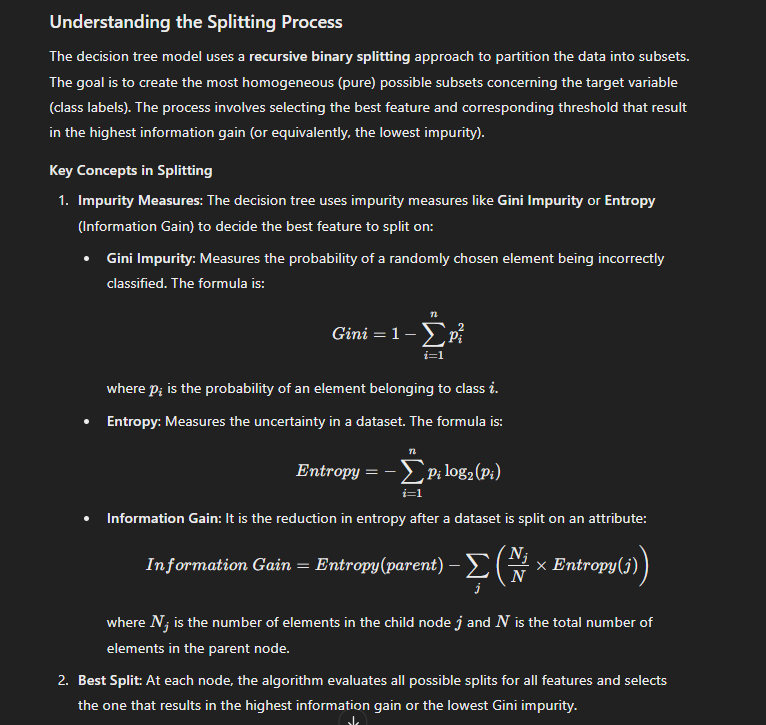

In [1]:
# Step 1: Importing Required Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [7]:
# Step 2: Loading the Dataset

# We load the Iris dataset, which contains 150 samples of iris flowers, with 4 features each (sepal length, sepal width, petal length, and petal width) and 3 target classes (setosa, versicolor, and virginica).

iris = load_iris()
X = iris.data
y = iris.target



In [8]:
# Step 3: Splitting the Dataset into Training and Testing Sets

#The dataset is split into training (70%) and testing (30%) sets to evaluate the model's performance on unseen data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Step 4: Training the Decision Tree Model
# We use the Gini index as the criterion by default
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

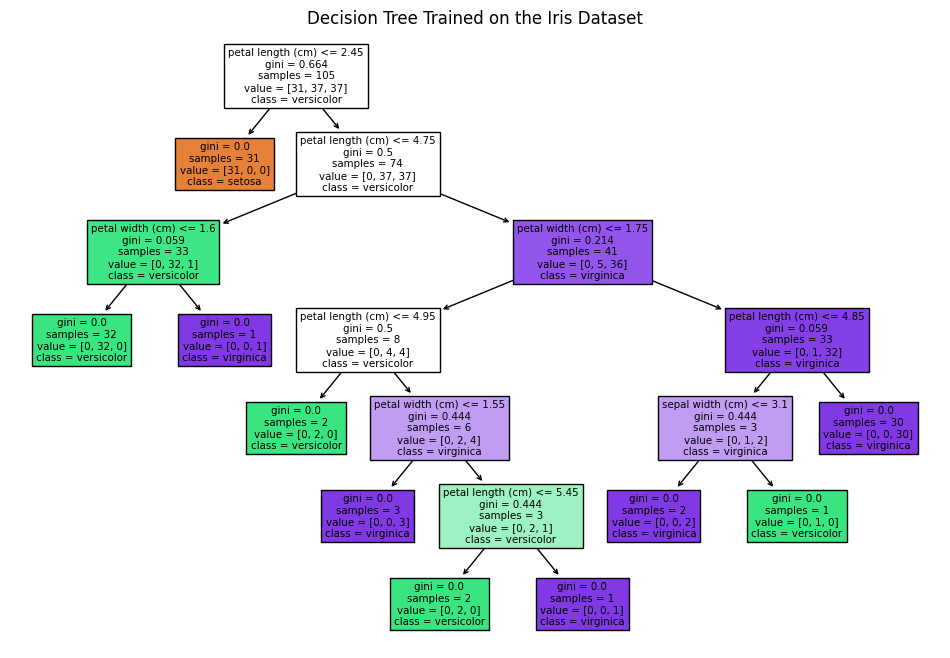

In [9]:
# Step 5: Visualizing the Decision Tree

# The decision tree is visualized using plot_tree, showing the splits based on features, the Gini index, and the class predictions at each leaf node.

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Trained on the Iris Dataset")
plt.show()



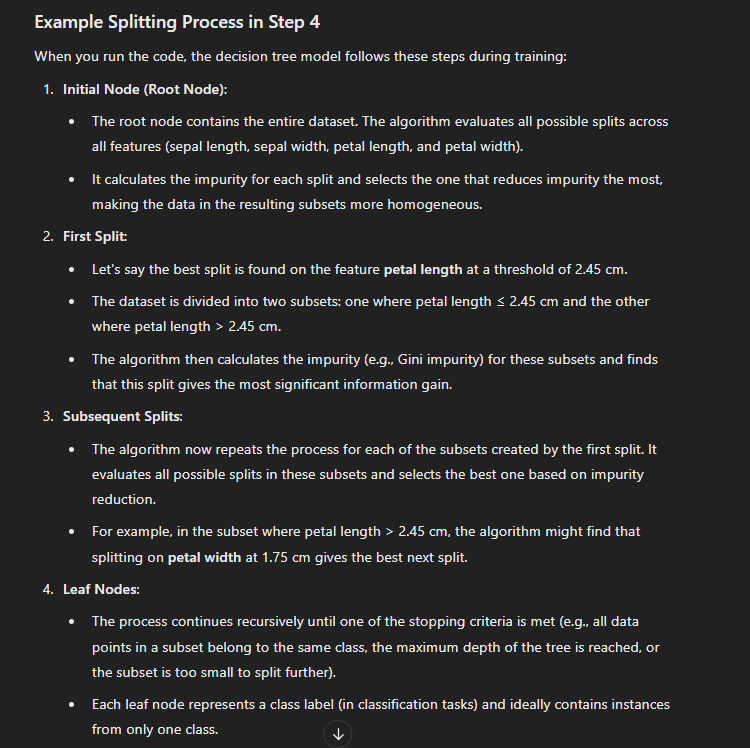

In [6]:
# Step 6: Evaluating the Model
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Classification Report
classification_report = metrics.classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(classification_report)


Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Test Input Features: [6.1 2.8 4.7 1.2]
Predicted Class: versicolor
Actual Class: versicolor


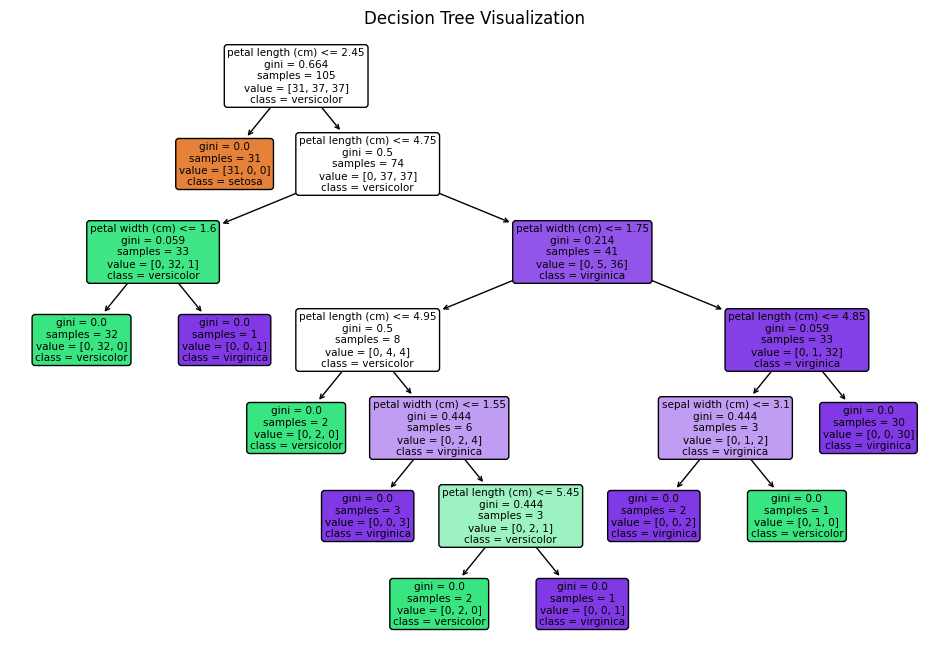

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Test Input: First sample from the test set
test_input = X_test[0].reshape(1, -1)  # Reshape for prediction
test_input_features = X_test[0]  # Original features

# Predicting the class for the test input
predicted_class = clf.predict(test_input)
predicted_class_name = iris.target_names[predicted_class[0]]

print("Test Input Features:", test_input_features)
print("Predicted Class:", predicted_class_name)

# The corresponding actual label for comparison
actual_class_name = iris.target_names[y_test[0]]
print("Actual Class:", actual_class_name)

# Visualizing the Decision Tree with highlighted paths
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Applications of Decision Trees


### 1. **Medical Diagnosis**
   - **Disease Classification**: Decision trees can be used to classify patients into different disease categories based on symptoms, test results, and demographic information. For example, a decision tree can help predict whether a patient has a certain type of cancer based on medical data.
   - **Risk Assessment**: They can be employed to assess the risk of developing certain conditions, such as predicting the likelihood of heart disease based on factors like age, cholesterol levels, and blood pressure.

### 2. **Finance and Banking**
   - **Credit Scoring**: Financial institutions use decision trees to determine whether to grant loans or credit to applicants by analyzing factors like income, credit history, and existing debts.
   - **Fraud Detection**: Decision trees can identify fraudulent transactions by recognizing patterns that are unusual or differ significantly from normal behavior.
   - **Investment Decisions**: In portfolio management, decision trees can help in making buy or sell decisions based on market indicators and financial metrics.

### 3. **Customer Relationship Management (CRM)**
   - **Customer Segmentation**: Businesses use decision trees to segment their customers based on purchasing behavior, demographic data, and other factors to tailor marketing strategies.
   - **Churn Prediction**: Companies can predict which customers are likely to leave (churn) by analyzing their interaction history, complaints, and purchase frequency, allowing targeted retention efforts.
   - **Product Recommendation**: Decision trees can be used to recommend products to customers based on their past purchases and preferences.

### 4. **Retail and E-commerce**
   - **Sales Prediction**: Retailers can use decision trees to forecast sales based on historical data, seasonal trends, and promotional campaigns.
   - **Inventory Management**: By predicting which products are likely to sell more during certain periods, decision trees help optimize inventory levels, reducing overstock and stockouts.

### 5. **Manufacturing**
   - **Quality Control**: Decision trees can be used to predict product defects or quality issues by analyzing data from the manufacturing process, helping to improve production efficiency.
   - **Process Optimization**: They help in optimizing production processes by identifying the most critical factors that influence output quality and efficiency.

### 6. **Education**
   - **Student Performance Prediction**: Decision trees can predict student performance based on factors such as attendance, grades, and participation, helping educators identify students who may need additional support.
   - **Dropout Prediction**: Educational institutions can predict which students are at risk of dropping out by analyzing demographic data, academic performance, and other relevant factors.

### 7. **Healthcare**
   - **Treatment Recommendations**: Decision trees can assist in recommending personalized treatment plans for patients based on their medical history, test results, and specific conditions.
   - **Emergency Response**: In emergency medicine, decision trees can help triage patients based on the severity of their symptoms and other critical factors, ensuring that resources are allocated efficiently.

### 8. **Telecommunications**
   - **Network Optimization**: Telecom companies use decision trees to optimize network performance by predicting potential issues based on traffic data, signal strength, and other parameters.
   - **Customer Retention**: By analyzing usage patterns and customer feedback, telecom companies can predict which customers are likely to switch providers and take proactive measures to retain them.

### 9. **Environmental Science**
   - **Wildlife Habitat Classification**: Decision trees can be used to classify habitats based on environmental variables, helping in conservation efforts.
   - **Climate Prediction**: They are used to predict climate conditions, such as rainfall or temperature patterns, based on historical weather data and geographic factors.

### 10. **Marketing**
   - **Campaign Effectiveness**: Marketers can use decision trees to predict the effectiveness of marketing campaigns by analyzing customer responses and engagement metrics.
   - **Lead Scoring**: Decision trees help in scoring leads based on their likelihood to convert into paying customers, allowing sales teams to prioritize their efforts.

### 11. **Energy**
   - **Load Forecasting**: Decision trees are used in predicting energy consumption patterns, helping utility companies manage demand and supply more efficiently.
   - **Fault Detection**: They help in detecting faults in power grids by analyzing sensor data and identifying patterns associated with failures.

### 12. **Human Resources**
   - **Employee Retention**: HR departments can predict which employees are likely to leave the company by analyzing job satisfaction, performance, and demographic data.
   - **Recruitment**: Decision trees can be used to screen candidates by predicting their suitability for a role based on their qualifications, experience, and other attributes.


# Application 1: decision tree for disease classification.

In [13]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [19]:
# Step 2: Create a Synthetic Medical Dataset
# Let's create a dataset with 1000 samples and 5 features:
# - Age
# - Blood Pressure
# - Cholesterol Level
# - Heart Rate
# - Genetic Risk Factor


#We generate a dataset with 5 features: Age, Blood Pressure, Cholesterol Level, Heart Rate, and Genetic Risk Factor.

#The target variable, Disease, is a binary outcome where 1 indicates the presence of a disease, and 0 indicates no disease. The disease is more likely for older individuals with higher blood pressure, cholesterol, heart rate, and genetic risk.

np.random.seed(42)

# Generating features
age = np.random.randint(20, 80, 1000)  # Age between 20 and 80
blood_pressure = np.random.randint(90, 180, 1000)  # Blood pressure between 90 and 180
cholesterol = np.random.randint(150, 300, 1000)  # Cholesterol level between 150 and 300
heart_rate = np.random.randint(60, 120, 1000)  # Heart rate between 60 and 120
genetic_risk = np.random.randint(0, 2, 1000)  # Genetic risk factor (0 or 1)

# Generating target variable (Disease: 0 for No, 1 for Yes)
# Assume higher values of these features increase the likelihood of having a disease
disease = (age > 50) & (blood_pressure > 140) & (cholesterol > 220) & (heart_rate > 80) & (genetic_risk == 1)
disease = disease.astype(int)

# Combining features into a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Blood Pressure': blood_pressure,
    'Cholesterol': cholesterol,
    'Heart Rate': heart_rate,
    'Genetic Risk': genetic_risk,
    'Disease': disease
})

# Display the first few rows of the dataset
print("Sample Data:")
print(data.head())



Sample Data:
   Age  Blood Pressure  Cholesterol  Heart Rate  Genetic Risk  Disease
0   58             123          271          84             1        0
1   71             161          280         118             1        1
2   48             128          297         109             1        0
3   34             115          195         102             0        0
4   62             123          164          78             0        0


In [15]:
# Step 3: Split the Dataset into Training and Testing Sets
X = data.drop('Disease', axis=1)
y = data['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [16]:
# Step 4: Train the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [17]:
# Step 5: Evaluate the Model
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)

# Classification Report
classification_report = metrics.classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("\nClassification Report:")
print(classification_report)




Accuracy: 1.00

Confusion Matrix:
[[287   0]
 [  0  13]]

Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       287
     Disease       1.00      1.00      1.00        13

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



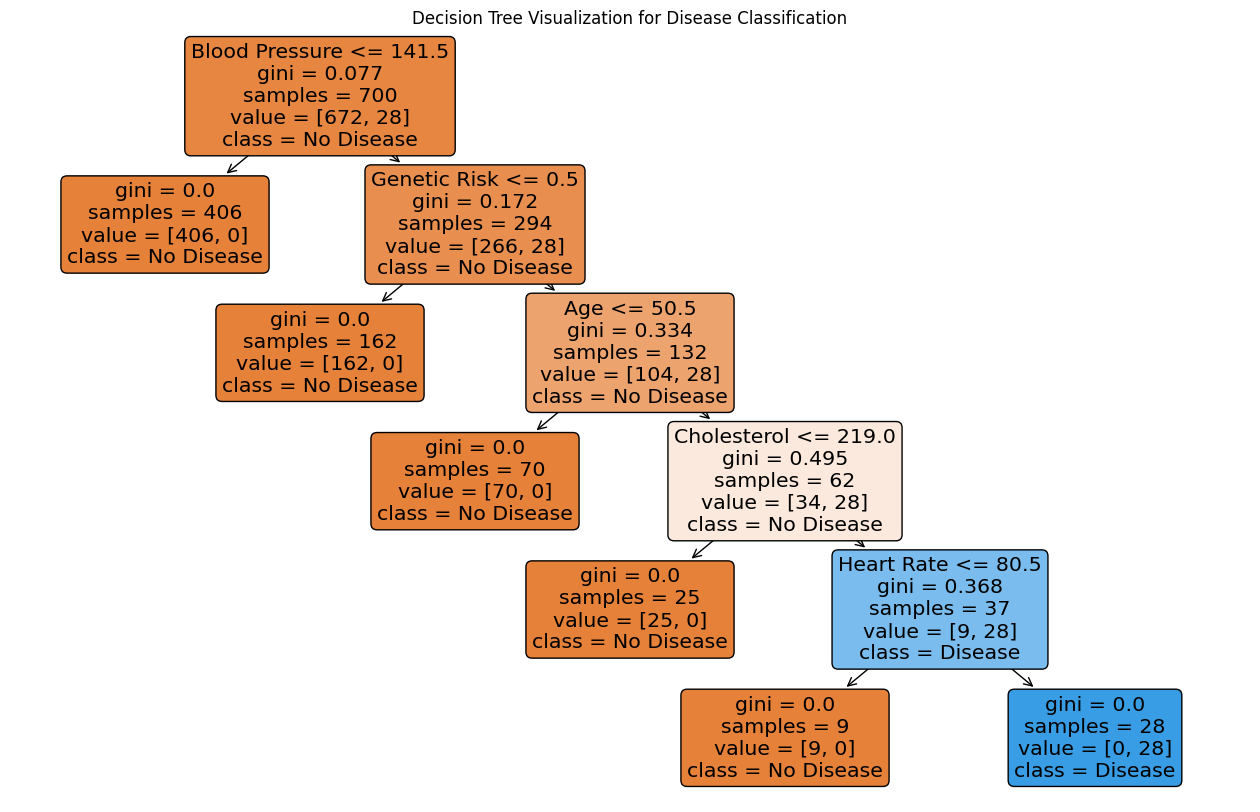

In [18]:
# Step 6: Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree Visualization for Disease Classification")
plt.show()


## explanation

### Detailed Analysis of the Decision Tree Image

The decision tree visualized in the image is used for classifying whether a patient has a disease (`Disease = 1`) or not (`Disease = 0`). Here's a breakdown of the tree structure and an analysis of how it makes decisions:

#### Root Node (First Split):
- **Feature**: `Blood Pressure <= 141.5`
- **Gini**: 0.077 (low impurity, meaning most samples are of the same class)
- **Samples**: 700 (total samples reaching this node)
- **Value**: `[672, 28]` (672 samples are classified as `No Disease`, 28 as `Disease`)
- **Class**: `No Disease`

**Analysis**:
- The decision tree starts by checking if the patient's blood pressure is less than or equal to 141.5. This is the most significant factor in the dataset that helps in distinguishing between patients with and without the disease.
- Since the gini index is very low, it shows that the majority of the patients (672 out of 700) do not have the disease if their blood pressure is below this threshold.

**Branches**:
- If `Blood Pressure <= 141.5` is **true** (left branch): Move to the next node where no further splits occur because all samples in this branch belong to `No Disease`.
- If `Blood Pressure > 141.5` is **false** (right branch): Move to the next node, where further splits occur to refine the decision.

#### Second Level of the Tree:
- **Left Child Node**:
  - **Gini**: 0.0 (perfect purity)
  - **Samples**: 406
  - **Value**: `[406, 0]`
  - **Class**: `No Disease`
  
  **Analysis**:
  - If blood pressure is less than or equal to 141.5, the tree classifies all 406 samples as `No Disease` without any further conditions.
  
- **Right Child Node**:
  - **Feature**: `Genetic Risk <= 0.5`
  - **Gini**: 0.172 (relatively low impurity)
  - **Samples**: 294
  - **Value**: `[266, 28]`
  - **Class**: `No Disease`

  **Analysis**:
  - If blood pressure is greater than 141.5, the next most important feature is the genetic risk factor. If the genetic risk factor is 0.5 or less, the majority still do not have the disease, but the decision isn't as clear-cut as the blood pressure threshold.

#### Third Level of the Tree:
- **Further Splits**:
  - **Left Child Node** of `Genetic Risk <= 0.5`:
    - **Gini**: 0.0
    - **Samples**: 162
    - **Value**: `[162, 0]`
    - **Class**: `No Disease`
    
    **Analysis**:
    - If the genetic risk factor is 0.5 or less, all 162 samples are classified as `No Disease`.

  - **Right Child Node** of `Genetic Risk > 0.5`:
    - **Feature**: `Age <= 50.5`
    - **Gini**: 0.334 (higher impurity, indicating more mixed classes)
    - **Samples**: 132
    - **Value**: `[104, 28]`
    - **Class**: `No Disease`

    **Analysis**:
    - If the genetic risk factor is higher than 0.5, the patient's age becomes the next deciding factor. Younger patients (50.5 years or less) are mostly classified as `No Disease`, but the impurity is higher here, meaning there's a larger mix of classifications.

#### Deeper Levels:
- **Further Splits** on Age and Cholesterol Level:
  - The tree continues to split on features like cholesterol level and heart rate for more refined decisions.
  - For instance, among patients older than 50.5 years with high genetic risk, if their cholesterol is above 219.0, and their heart rate is above 80.5, they are classified as having the disease.

### Conclusion

1. **Significance of Features**:
   - **Blood Pressure** is the most significant factor for determining the presence of the disease.
   - **Genetic Risk** and **Age** are also

# Above application using Tensorflow

In [2]:
!pip install tensorflow_decision_forests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 85.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd

# Creating the synthetic dataset
np.random.seed(42)

age = np.random.randint(20, 80, 1000)
blood_pressure = np.random.randint(90, 180, 1000)
cholesterol = np.random.randint(150, 300, 1000)
heart_rate = np.random.randint(60, 120, 1000)
genetic_risk = np.random.randint(0, 2, 1000)

disease = (age > 50) & (blood_pressure > 140) & (cholesterol > 220) & (heart_rate > 80) & (genetic_risk == 1)
disease = disease.astype(int)

# Combining features into a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Blood Pressure': blood_pressure,
    'Cholesterol': cholesterol,
    'Heart Rate': heart_rate,
    'Genetic Risk': genetic_risk,
    'Disease': disease
})

print("Sample Data:")
print(data.head())


Sample Data:
   Age  Blood Pressure  Cholesterol  Heart Rate  Genetic Risk  Disease
0   58             123          271          84             1        0
1   71             161          280         118             1        1
2   48             128          297         109             1        0
3   34             115          195         102             0        0
4   62             123          164          78             0        0


In [4]:
 #Train the Decision Tree Model

 import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Convert the pandas DataFrame into TensorFlow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Disease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Disease")

# Train the Decision Tree model
model = tfdf.keras.CartModel()
model.fit(train_ds)

# Summarize the model
model.summary()


Use /tmp/tmpwh1smkcq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:13.926773. Found 700 examples.
Training model...
Model trained in 0:00:00.079033
Compiling model...
Model compiled.
Model: "cart_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Age
	Blood_Pressure
	Cholesterol
	Genetic_Risk
	Heart_Rate

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Blood_Pressure"  1.000000 ################
    2.   "Genetic_Risk"  0.500000 #####
    3.            "Age"  0.352941 ##
    4.    "Cholesterol"  0.285714 
    5.     "Heart_Rate"  0.250000 

Variable Importance: NUM_AS_ROOT:
    1. "Blood_Pressure"  1.0000

In [4]:
# Evaluate the model on the test data
evaluation = model.evaluate(test_ds, return_dict=True)

print("\nTest Accuracy:", evaluation["accuracy"])


In [6]:
# Visualize the decision tree
# We visualize the structure of the decision tree up to a depth of 3. This helps to understand the decisions the model is making at each node.
import matplotlib.pyplot as plt
from IPython.display import display

# The model contains only one tree (a decision tree), so the tree index is 0.
tfdf.model_plotter.plot_model(model, tree_idx=0, max_depth=3)
plt.show()


# Application 2: Wildlife Habitat Classification using Decision Tree

In [7]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [14]:
# Generate Simulated Dataset
# Let's assume we have 4 environmental variables (features) and 3 types of habitats (classes)

# : We create a synthetic dataset with 4 features representing environmental variables and 3 classes representing different types of habitats (Forest, Desert, Wetland).

# Number of samples
n_samples = 200

# Environmental variables (e.g., temperature, rainfall, vegetation index, altitude)
X = np.random.rand(n_samples, 4) * 100  # Random values scaled to 100

# Simulated class labels for habitats: 0 = Forest, 1 = Desert, 2 = Wetland
y = np.random.choice([0, 1, 2], size=n_samples)

# Creating a DataFrame for better visualization
data = pd.DataFrame(X, columns=['Temperature', 'Rainfall', 'Vegetation_Index', 'Altitude'])
data['Habitat'] = y
print("Sample Data:")
print(data.head())


Sample Data:
   Temperature   Rainfall  Vegetation_Index   Altitude  Habitat
0    81.838042   4.013886         88.991338  99.196275        1
1    29.406746  21.031856         76.536336  25.302634        0
2    86.556238  10.284259         12.595520  97.915156        0
3    67.383890  84.688722         32.432938  67.648375        0
4    59.424183  60.315012         68.253246  57.535917        2


In [9]:
#  Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [10]:
#  Train the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Evaluate the Model
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Classification Report
classification_report = metrics.classification_report(y_test, y_pred, target_names=['Forest', 'Desert', 'Wetland'])
print("Classification Report:")
print(classification_report)

Model Accuracy: 0.33
Confusion Matrix:
[[ 6  1  7]
 [10  5  7]
 [12  3  9]]
Classification Report:
              precision    recall  f1-score   support

      Forest       0.21      0.43      0.29        14
      Desert       0.56      0.23      0.32        22
     Wetland       0.39      0.38      0.38        24

    accuracy                           0.33        60
   macro avg       0.39      0.34      0.33        60
weighted avg       0.41      0.33      0.34        60



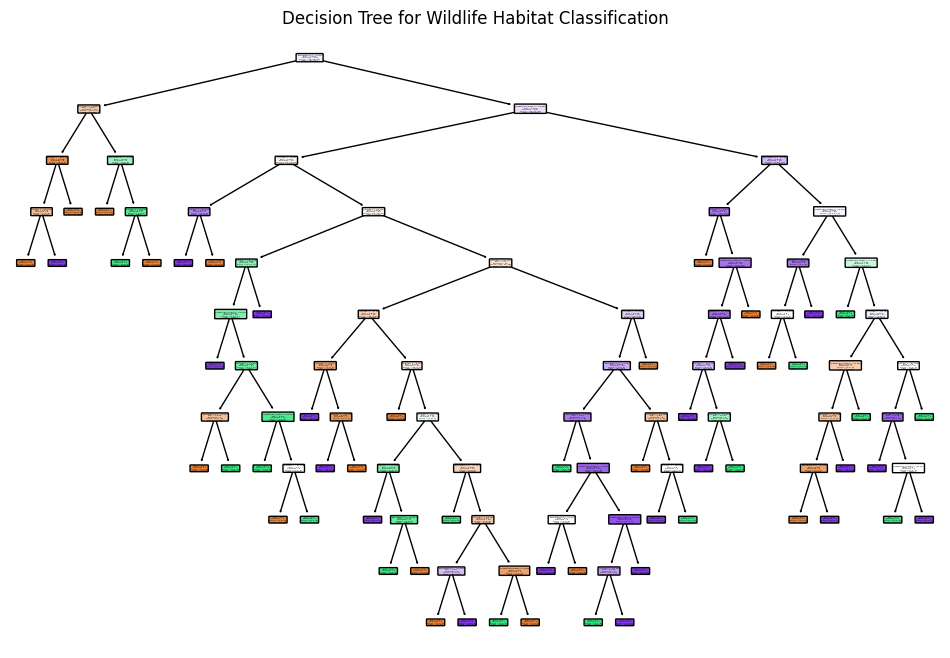

In [13]:
#  Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['Temperature', 'Rainfall', 'Vegetation_Index', 'Altitude'],
          class_names=['Forest', 'Desert', 'Wetland'], rounded=True)
plt.title("Decision Tree for Wildlife Habitat Classification")
plt.show()

In [16]:
# EXAMPLE
# Example Input
#Suppose we have the following environmental data:

#emperature: 65.0 (in some unit)
#Rainfall: 80.0 (in some unit)
#Vegetation Index: 50.0 (on a scale from 0 to 100)
#Altitude: 300.0 (in some unit)

# Example input representing environmental data
example_input = np.array([[65.0, 80.0, 50.0, 300.0]])

# Predicting the habitat class for the example input
predicted_class = clf.predict(example_input)
predicted_class_name = ['Forest', 'Desert', 'Wetland'][predicted_class[0]]

print("Example Input Features:")
print("Temperature:", example_input[0][0])
print("Rainfall:", example_input[0][1])
print("Vegetation Index:", example_input[0][2])
print("Altitude:", example_input[0][3])

print("Predicted Habitat Class:", predicted_class_name)


Example Input Features:
Temperature: 65.0
Rainfall: 80.0
Vegetation Index: 50.0
Altitude: 300.0
Predicted Habitat Class: Forest
